In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

In [120]:
df=pd.read_csv('admission.csv')

In [121]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#    EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.shape

(500, 9)

In [10]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
397,398,330,116,4,5.0,4.5,9.45,1,0.91
92,93,298,98,2,4.0,3.0,8.03,0,0.34
366,367,320,104,3,3.5,4.5,8.34,1,0.74
171,172,334,117,5,4.0,4.5,9.07,1,0.89
442,443,331,116,4,4.5,4.5,9.44,1,0.92
486,487,319,102,3,2.5,2.5,8.37,0,0.68
429,430,340,115,5,5.0,4.5,9.06,1,0.95
125,126,300,100,3,2.0,3.0,8.66,1,0.64
201,202,315,110,2,3.5,3.0,8.46,1,0.72
460,461,319,105,4,4.0,4.5,8.66,1,0.77


In [11]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [12]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [16]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
df.columns=[i.lower().strip() for i in df.columns]        # column names in small letters

In [20]:
df

,serial no.,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [21]:
df.describe()

,serial no.,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# dropping serial no column

In [26]:
df=df.drop(columns='serial no.')

In [27]:
df.corr()               # shows correlation

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
gre score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
toefl score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
university rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
chance of admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [28]:
df.head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# correlation

<AxesSubplot:>

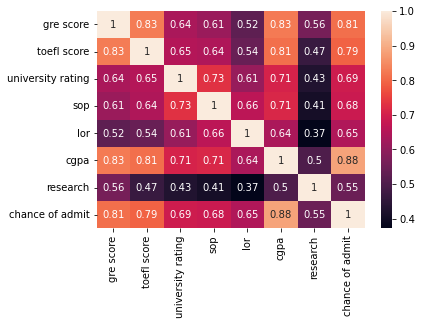

In [32]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
research has very less correlation with chance of admit in university.
gre, toefl and cgpa score has high correlation with admission.
cgpa has high correlation between gre and toefl columns.

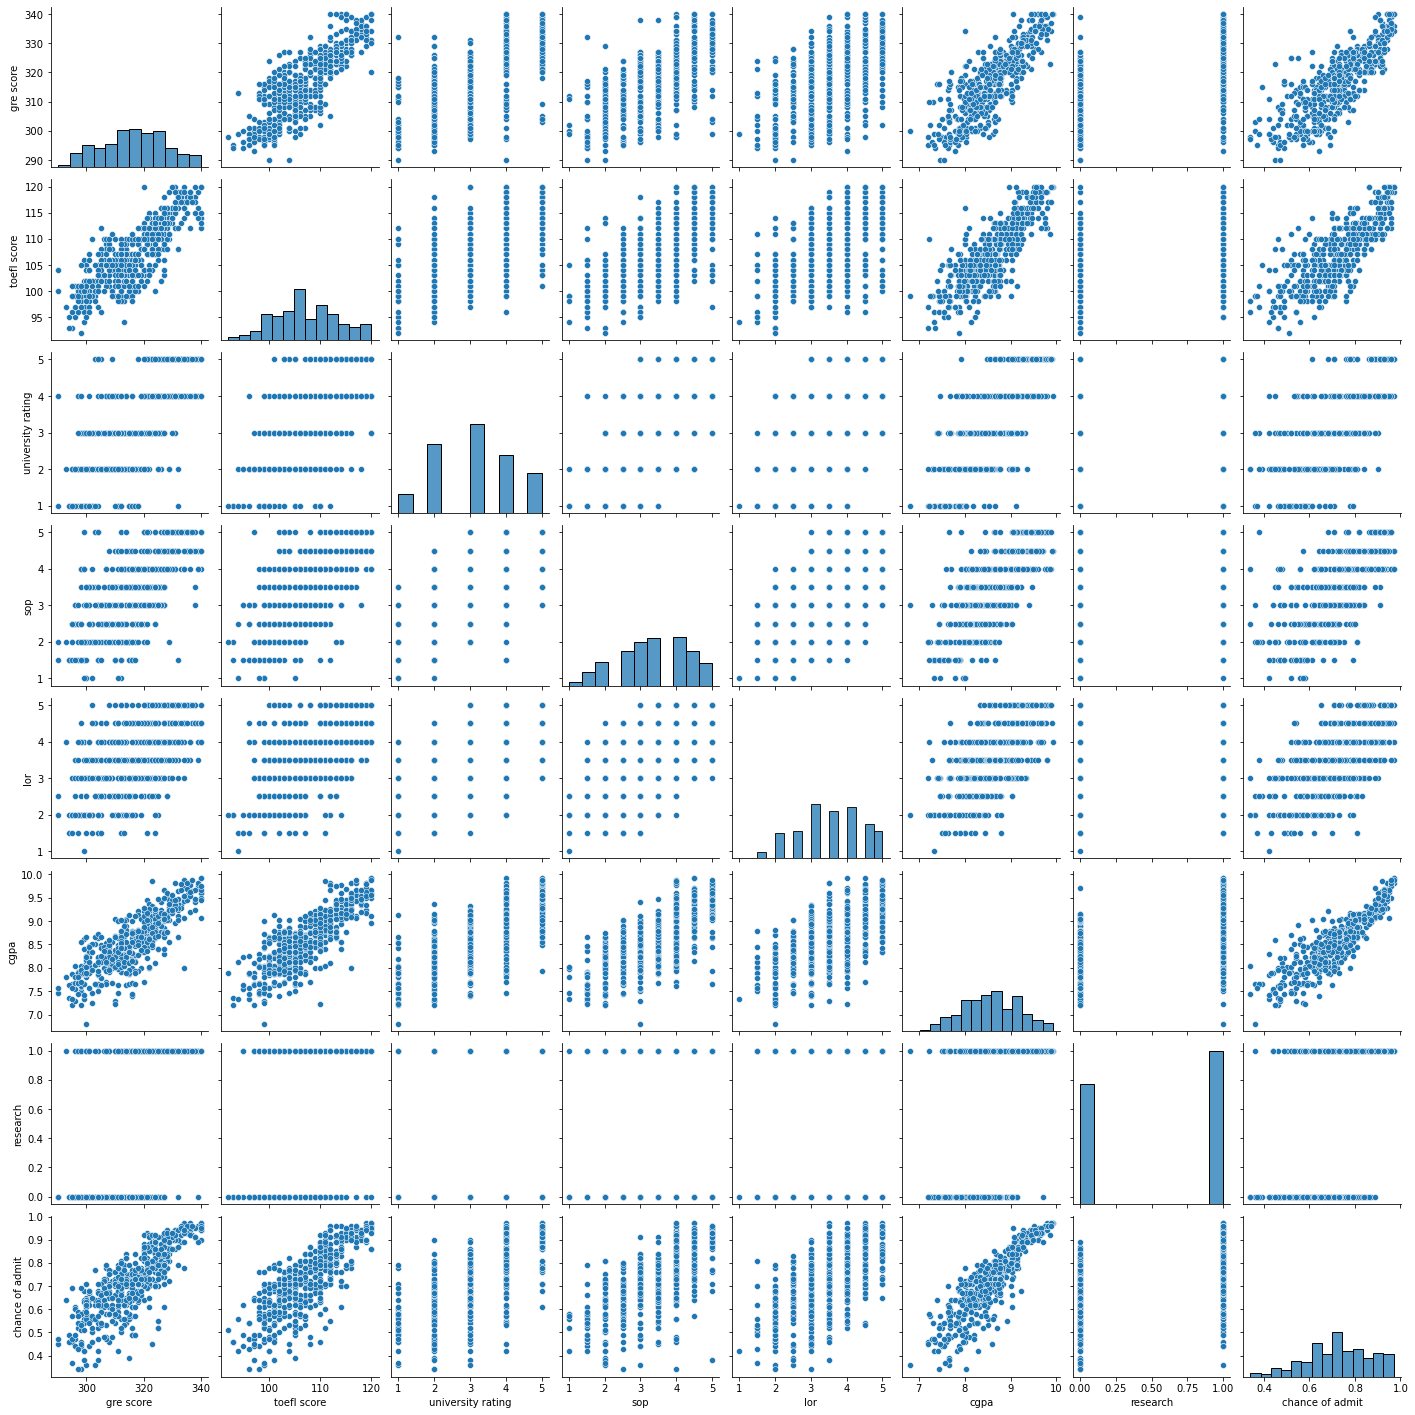

In [33]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='university rating', ylabel='count'>

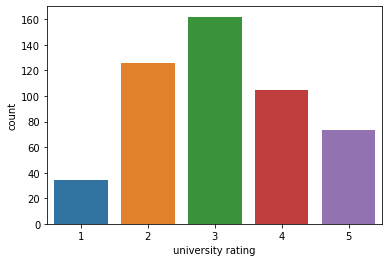

In [34]:
sns.countplot(x=df['university rating'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='research', ylabel='count'>

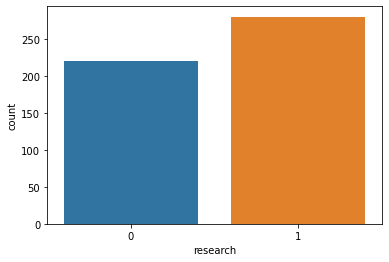

In [35]:
sns.countplot(df['research'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chance of admit', ylabel='count'>

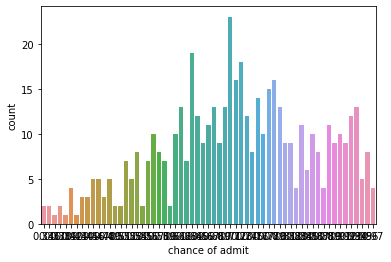

In [38]:
sns.countplot(df['chance of admit'])

In [40]:

print("Maximun GREscore :", max(df['gre score']))
print("Minimum GREscore :", min(df['gre score']))

Maximun GREscore : 340
Minimum GREscore : 290


In [42]:
percentage_of_universityrating=df['university rating'].value_counts(normalize=True)
percentage_of_universityrating

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: university rating, dtype: float64

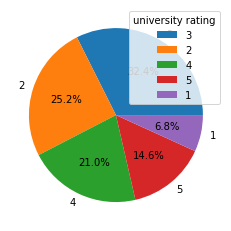

In [58]:
plt.pie(percentage_of_universityrating, labels=percentage_of_universityrating.index , autopct= '%2.1f%%' )
plt.legend(title='university rating')

# converting target variable to categorical

In [122]:
# Converting the target variable to categorical having values 0 and 1
y_train = [1 if each > 0.80 else 0 for each in ytrain]
y_test = [1 if each > 0.80 else 0 for each in ytest]

In [119]:
df['chance of admit'].value_counts()

0    358
1    142
Name: chance of admit, dtype: int64

# building decisiontree model

In [123]:
x=df.iloc[::-1]
y=df.iloc[:,-1]

In [126]:
x_encoded = pd.get_dummies(x,drop_first=True)
x_encoded

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
499,500,327,113,4,4.5,4.5,9.04,0,0.84
498,499,312,103,4,4.0,5.0,8.43,0,0.73
497,498,330,120,5,4.5,5.0,9.56,1,0.93
496,497,337,117,5,5.0,5.0,9.87,1,0.96
495,496,332,108,5,4.5,4.0,9.02,1,0.87
...,...,...,...,...,...,...,...,...,...
4,5,314,103,2,2.0,3.0,8.21,0,0.65
3,4,322,110,3,3.5,2.5,8.67,1,0.80
2,3,316,104,3,3.0,3.5,8.00,1,0.72
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [131]:
# building a decision tree classifier
des_tree=DecisionTreeClassifier(criterion='entropy',random_state=50,max_depth = 4, min_samples_leaf =5)
des_tree.fit(xtrain,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=50)

In [132]:
des_tree_fit=des_tree.fit(xtrain,y_train)

In [133]:
y_pred=des_tree_fit.predict(xtest)

In [134]:
accuracy_score(y_test,y_pred)

0.6776119402985075

# Perform Hyperparameter Tuning

In [137]:
des_tree_2=DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth = 5, min_samples_leaf = 10)
des_tree_2.fit(xtrain,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=100)

In [138]:
des_tree_gini=des_tree_2.fit(xtrain,y_train)

In [139]:
y_pred_1=des_tree_gini.predict(xtest)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_1)

0.6507462686567164

# random forest model building

In [146]:
rand_forest= RandomForestClassifier(n_estimators=10)
rand_forest_fit=  rand_forest.fit(xtrain,y_train)

In [145]:
y_pred_2=rand_forest_fit.predict(xtest)

In [148]:
accuracy_score(y_test, y_pred_2)

0.6656716417910448

In [149]:
y_probability = rand_forest.predict_proba(xtest)

In [151]:
print(confusion_matrix(y_test, y_pred_2))

[[215  19]
 [ 93   8]]


In [152]:
# Visualizing the ROC-AUC curve 

# We take the predicted values of class 1
y_predicted = y_probability[:,1]

# We check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.  0.2 0.4 0.  0.1 0.2 0.1 0.6 0.2 0.3 0.1 0.5 0.4 0.5 0.1 0.5 0.5 0.2
 0.2 0.5 0.1 0.3 0.3 0.  0.3 0.2 0.5 0.3 0.4 0.2 0.2 0.2 0.2 0.2 0.1 0.3
 0.3 0.2 0.3 0.2 0.3 0.4 0.4 0.  0.4 0.1 0.4 0.  0.  0.3 0.2 0.3 0.6 0.4
 0.2 0.2 0.3 0.3 0.2 0.  0.1 0.1 0.1 0.4 0.  0.5 0.3 0.1 0.1 0.3 0.1 0.2
 0.1 0.  0.  0.3 0.1 0.2 0.2 0.4 0.  0.2 0.6 0.  0.3 0.3 0.4 0.  0.5 0.5
 0.1 0.1 0.1 0.4 0.3 0.5 0.  0.4 0.1 0.1 0.2 0.4 0.3 0.4 0.2 0.  0.4 0.
 0.4 0.1 0.4 0.7 0.2 0.4 0.2 0.2 0.4 0.1 0.4 0.2 0.2 0.3 0.3 0.1 0.2 0.5
 0.  0.1 0.1 0.4 0.1 0.2 0.5 0.4 0.3 0.5 0.3 0.2 0.  0.5 0.4 0.1 0.  0.1
 0.3 0.3 0.3 0.5 0.4 0.1 0.2 0.5 0.2 0.3 0.1 0.5 0.3 0.7 0.4 0.2 0.2 0.3
 0.1 0.3 0.  0.3 0.4 0.  0.5 0.2 0.4 0.6 0.3 0.2 0.7 0.2 0.3 0.1 0.2 0.7
 0.1 0.1 0.1 0.2 0.4 0.6 0.1 0.1 0.1 0.6 0.4 0.4 0.3 0.1 0.4 0.1 0.3 0.
 0.3 0.4 0.2 0.1 0.5 0.1 0.  0.1 0.  0.  0.1 0.7 0.5 0.3 0.1 0.  0.2 0.1
 0.4 0.4 0.2 0.5 0.4 0.3 0.5 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.1 0.2 0.5 0.1
 0.3 0.7 0.2 0.  0.  0.1 0.2 0.1 0.5 0.4 0.4 0.5 0.2 

In [154]:
# Using roc_curve() to generate fpr & tpr values
fpr, tpr, thresholds = roc_curve(y_test,y_predicted)

# Passing the fpr & tpr values to auc() to calculate the area under curve
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)

print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.4906279089447407


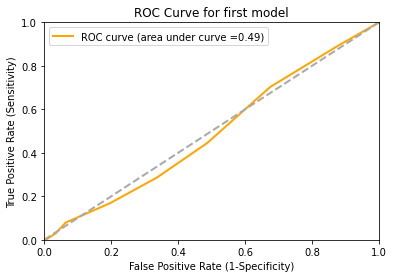

In [155]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'orange', lw = 2, label = 'ROC curve (area under curve =%0.2f)'%roc_auc)

plt.plot([0,1],[0,1], color = 'darkgrey',lw = 2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for first model')
plt.legend(loc = "upper left")
plt.show()

# CLASSIFICATION REPORT

In [156]:
from sklearn.metrics import classification_report

In [157]:
models={'DECISION TREE' :des_tree,'RANDOM FOREST' :rand_forest}

In [158]:
for model_name, model in models.items():
    pred_train = model.predict(xtrain)
    print('Training Result',model_name)
    print(classification_report(y_train,pred_train))
    
    pred_test=model.predict(xtest)
    print('Test Result',model_name)
    print(classification_report(y_test,pred_test))

Training Result DECISION TREE
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       124
           1       0.82      0.22      0.35        41

    accuracy                           0.79       165
   macro avg       0.81      0.60      0.61       165
weighted avg       0.80      0.79      0.75       165

Test Result DECISION TREE
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       234
           1       0.32      0.06      0.10       101

    accuracy                           0.68       335
   macro avg       0.51      0.50      0.45       335
weighted avg       0.58      0.68      0.59       335

Training Result RANDOM FOREST
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       124
           1       1.00      0.88      0.94        41

    accuracy                           0.97       165
   macro avg       0.98      0.94      0.9